<a href="https://colab.research.google.com/github/AlexCarvallho19/IA/blob/main/Alex_Kardell_Leite_de_Carvalho_03_notebook_exercicio_pratico_comparativo_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercício Prático - Comparativo com Vinhos

Classificação de Qualidade de Vinhos do tipo 'Tinto' (Arquivo fornecido junto com notebook - 'winequality-red.csv')

Utilizar as técnicas de Cross-Validation e StratifiedKFold no problema de classificação dos Vinhos

# 1 - Extração dos Atributos



In [ ]:
# Seus códigos para a etapa 1 deverão ser criados aqui:
import pandas as pd

import matplotlib.pyplot as plt

arquivo = 'https://raw.githubusercontent.com/rafaelmm82/ufpb-ia-20201/master/02-fundamentos_de_ia/02_exercicio_pratico/winequality-red.csv'

dataset = pd.read_csv(arquivo, header=0, sep=";")
print(dataset.shape)


(1599, 12)


# 2 - Divisão dos Dados com Cross-Validation


In [ ]:
# Seus códigos para a etapa 2 deverão ser criados aqui:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# aqui carrega os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

array = dataset.values
X = array[:,0:11]
y = array[:,11]

# aqui estou separando treino e validação
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# para criar o stratificado
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# aqui to criando o modelo e aplicando o cross-validation
model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
print('cv_results ', cv_results)

cv_results  [0.54296875 0.5703125  0.609375   0.5390625  0.58823529]


# 3 - Comparativo entre Modelos Com Cross-Validation e StratifiedKFold


5 treinamentos realizados
resultado treino: 0.5078125

resultado treino: 0.51953125

resultado treino: 0.57421875

resultado treino: 0.48828125

resultado treino: 0.5490196078431373

LR, média0.5277726715686274 e desvio padrão 0.030445270104691887
modelo LR: média 0.569991 desvio(0.026724)

modelo KNN: média 0.498863 desvio(0.038901)

modelo SVM: média 0.561403 desvio(0.020633)

modelo CART: média 0.602056 desvio(0.022721)

modelo LDA: média 0.590340 desvio(0.041203)

modelo NB: média 0.527773 desvio(0.030445)



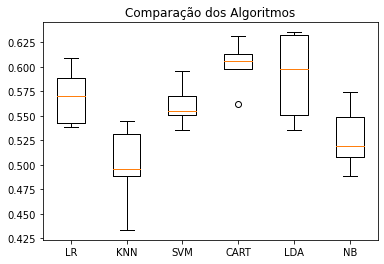

[0.54296875 0.5703125  0.609375   0.5390625  0.58823529]
[0.49609375 0.48828125 0.53125    0.43359375 0.54509804]
[0.5546875  0.5703125  0.55078125 0.53515625 0.59607843]
[0.59765625 0.5625     0.61328125 0.60546875 0.63137255]
[0.53515625 0.59765625 0.6328125  0.55078125 0.63529412]
[0.5078125  0.51953125 0.57421875 0.48828125 0.54901961]


In [ ]:
# Seus códigos para a etapa 3 deverão ser criados aqui: 
# isso daqui exibe os dados individualmente
print(f'{len(cv_results)} treinamentos realizados')

# vários prints por resultado
for valor in cv_results:
  print(f'resultado treino: {valor}\n')

#imprimir agora a média e o desvio padrão
print(f'LR, média{cv_results.mean()} e desvio padrão {cv_results.std()}')

# criando os modelos e adicionando num vetor de tuplas pra facilitar o código
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

# avaliando cada um dos modelos utilizando cross-validation com stratified
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('modelo %s: média %f desvio(%f)\n' % (name, cv_results.mean(), cv_results.std()))
 
 # Compare Algoritmos
plt.boxplot(results, labels=names)
plt.title('Comparação dos Algoritmos')
plt.show()

# exibindo os resultados gerais
for result in results:
  print(result)